<a href="https://colab.research.google.com/github/jacantero/Teacher/blob/main/Demo_IA_temperatura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Recordamos que en la práctica con sensores, programamos la lógica para que Arduino encendiera y apagara el LED en función de la temperatura y de la luz. La idea de esta práctica es sustituir nuestro código hecho a mano para la temperatura

```
 if (TMP_valor<153){
        digitalWrite(LED, HIGH);
    }
  else if (TMP_valor>=153){
        digitalWrite(LED, LOW);
    }
    delay (100);
```

por un modelo de IA

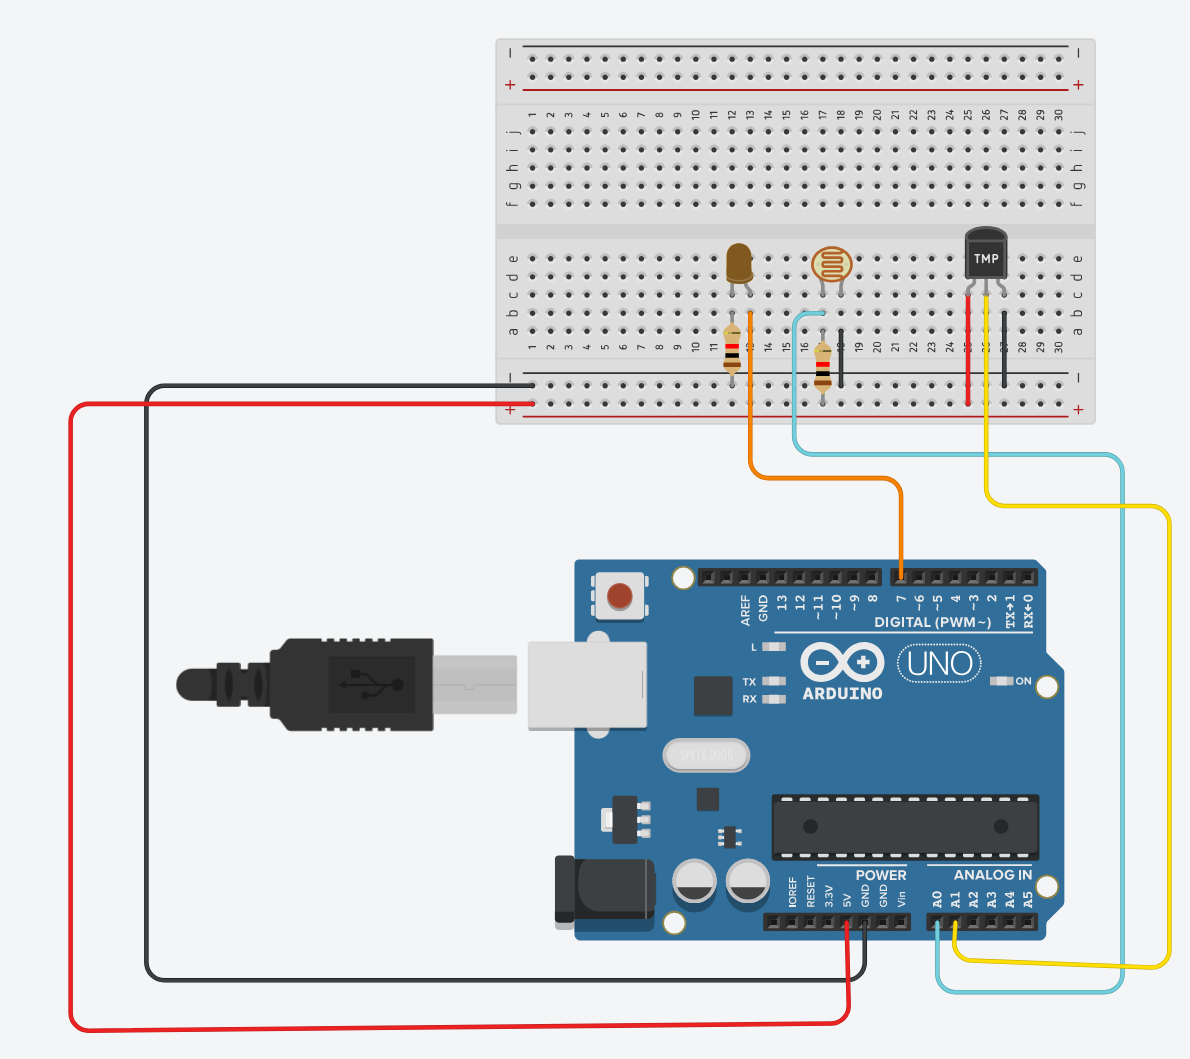

In [1]:
"""Primero importamos las librerías que vamos a necesitar: numpy para los datos que vamos a introducir al modelo y keras para el modelo de IA"""

#Imports
from keras import Sequential, layers
import numpy as np
from sklearn.preprocessing import MinMaxScaler #Esta librería es para el preprocesamiento de los inputs del modelo

In [2]:
"""Cargamos un array con los datos de temperatura. Para cada valor, necesitamos decirle a la IA si debe encender el led o no"""

## Data initialization
temp = np.random.randint(20, 358, 1000)
led = temp < 153
print("temp:", temp)
print("led:", led)

temp: [ 48  92 263 350 351  73 260 121 242 270 181 260 163  43 316 327 124  95
 307 210  79 308 148 152 213 223 106 322 190 316 189  31 201  46 146 217
 342 348 244 120  76 210 308 133 284 288  48 275  55 300 126  82  52 292
 155 231 172  25 205 171  57 116  85  67 215 316 201  56 197  55 218 184
  73 158 148 147 125 211 249 258 252 304  43 357 133 289 110 252 294 146
 110 161 199  21  30 295 198 131  99 206 170 246 342 283  82 142  71 354
 298 238  75 144 171 242  30 250 170  61  69  77  89 182 150 260  73 267
 108 308 285  35 303 141 317  50 202 311  25 284 138 191  29 140 349 103
 235 112  36  45  93  96 220  89 258 202 143  78 255 263  86 146 354 183
 224 161 317 281 352 244 220 172 248 194 350 263 177 319  37 116 126 128
 117 330 322  34 173  77 267 181 287 355 241 347 140 341 134 148  63  34
 273 100 102 340 217 164  73 308 204 161 325 177 164 293  37  59 178 223
 281 278  77 122  63 166  35 153 138  48 239 243  65 173 220 206 323 340
 109 108  50 190 348 193 100 156  58 100 134 

In [27]:
"""Una red neuronal sólo puede trabajar con números. Además, es importante que estén entre 0 y 1
para evitar un fenómeno que se conoce como exploding gradient"""
#Normalizamos los valores de teperatura para que estén entre 0 y 1
scaler = MinMaxScaler()
norm_temp = scaler.fit_transform(temp.reshape(-1, 1))
print(norm_temp)

[[0.08308605]
 [0.21364985]
 [0.72106825]
 [0.97922849]
 [0.98219585]
 [0.15727003]
 [0.71216617]
 [0.29970326]
 [0.65875371]
 [0.74183976]
 [0.47774481]
 [0.71216617]
 [0.42433234]
 [0.06824926]
 [0.87833828]
 [0.91097923]
 [0.30860534]
 [0.22255193]
 [0.85163205]
 [0.56379822]
 [0.17507418]
 [0.85459941]
 [0.37982196]
 [0.39169139]
 [0.5727003 ]
 [0.60237389]
 [0.25519288]
 [0.89614243]
 [0.50445104]
 [0.87833828]
 [0.50148368]
 [0.03264095]
 [0.53709199]
 [0.07715134]
 [0.37388724]
 [0.58456973]
 [0.95548961]
 [0.97329377]
 [0.66468843]
 [0.29673591]
 [0.16617211]
 [0.56379822]
 [0.85459941]
 [0.33531157]
 [0.78338279]
 [0.79525223]
 [0.08308605]
 [0.75667656]
 [0.10385757]
 [0.83086053]
 [0.31454006]
 [0.18397626]
 [0.09495549]
 [0.80712166]
 [0.40059347]
 [0.62611276]
 [0.45103858]
 [0.0148368 ]
 [0.54896142]
 [0.44807122]
 [0.10979228]
 [0.28486647]
 [0.19287834]
 [0.13946588]
 [0.57863501]
 [0.87833828]
 [0.53709199]
 [0.10682493]
 [0.52522255]
 [0.10385757]
 [0.58753709]
 [0.48

In [4]:
#Convertimos los valores de True y False en 0 y 1
norm_led = 1*led
print(norm_led)

[1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0
 0 0 1 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0
 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1
 1 0 0 1 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1
 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0
 1 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0
 1 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0
 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0
 1 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0
 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 1
 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 

In [5]:
"""Una vez tenemos definidas nuestras variables, podemos definir nuestro modelo"""

# Definir el modelo MLP
model = Sequential([
    layers.Input(shape=(1,)),  # Una sola característica de entrada (la temperatura)
    layers.Dense(16, activation='relu'),  # Capa oculta con 16 neuronas y activación ReLU
    layers.Dense(8, activation='relu'),   # Segunda capa oculta con 8 neuronas y ReLU
    layers.Dense(1, activation='sigmoid') # Capa de salida para clasificación binaria
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Función de pérdida para clasificación binaria
              metrics=['accuracy'])

# Mostrar el resumen del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │              32 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 177 (708.00 B)

 Trainable params: 177 (708.00 B)

 Non-trainable params: 0 (0.00 B)

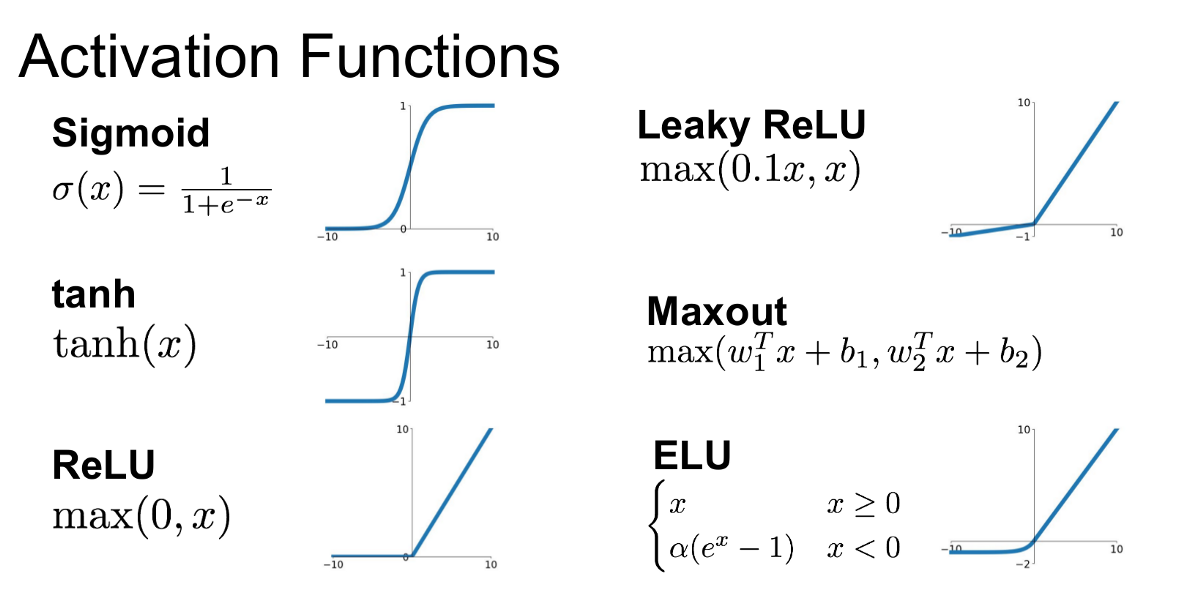

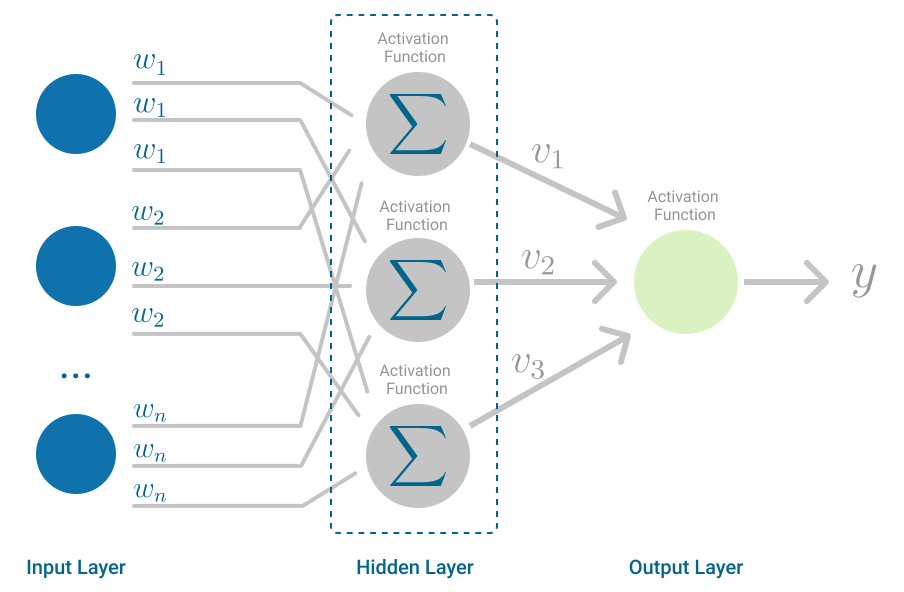

In [6]:
"""¡Ya lo tenemos todo listo! Ahora sólo queda entrenar al modelo"""
# Entrenar el modelo
model.fit(norm_temp, norm_led, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - accuracy: 0.6054 - loss: 0.6247 - val_accuracy: 0.6200 - val_loss: 0.6133
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.5894 - loss: 0.6179 - val_accuracy: 0.6200 - val_loss: 0.6027
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.6084 - loss: 0.6049 - val_accuracy: 0.6200 - val_loss: 0.5927
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5931 - loss: 0.6011 - val_accuracy: 0.6200 - val_loss: 0.5809
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.6025 - loss: 0.5856 - val_accuracy: 0.6200 - val_loss: 0.5697
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.5988 - loss: 0.5751 - val_accuracy: 0.6200 - val_loss: 0.5580
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.5963 - loss: 0.5672 - val_accuracy: 0.6200 - val_loss: 0.5462
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5977 - loss: 0.5569 - val_accuracy: 0.6400 - v

In [ ]:
"""¡Parece que lo tenemos! El modelo es capaz de predecir cuando tiene que encender el led con una
    precisión cercana al 100%. Ahora vamos a probar sus predicciones para nuevos valores del sensor de temperatura"""

In [ ]:
"""Creamos la función que permite pasar de ºC a analogRead. Para ello, interpolamos
los valores obtenidos con la simulación de TinkerCad"""

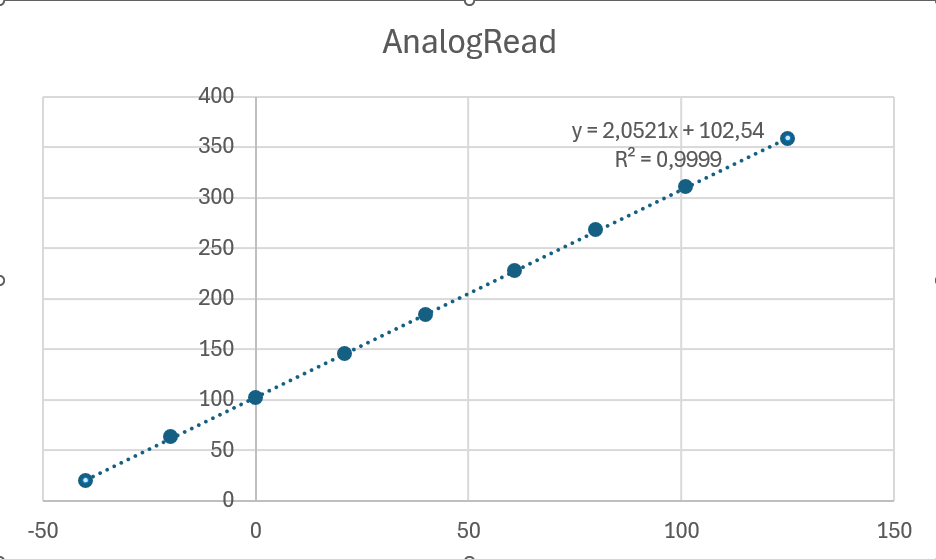

In [20]:
#Podemos ver que la relación entre el analogRead y la temperatura en Celsius es prácticamente lineal
#Definimos una función para hacer la conversión de celsius a analogRead
def analogRead(temp_in_celsius):
  analog_read = 2.0521*temp_in_celsius + 102.54
  return analog_read

In [44]:
temp_to_pred = analogRead(15)
print(temp_to_pred)

133.32153


In [45]:
"""Hay un cierto error de precisión en la fórmula, pero más o menos nos sirve.
   Ahora que la tenemos, podemos hacer que el modelo directamente prediga a partir
   de la temperatura si tenemos que encender el led o no"""
#Primero, tenemos que volver a pasarla la temperatura normalizada
temp_to_pred_norm = scaler.transform(np.array(temp_to_pred).reshape(1,-1))

#Una vez normalizada, ya podemos pasársela al modelo para que intente predecir si el led
#debe estar encendido o no
led_status_pred = model.predict(temp_to_pred_norm)
print(led_status_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[0.6296263]]


In [46]:
#Cómo la salida de la red es una sigmoid, se puede ver que el resultado estará comprendido
#entre 0 y 1. 0 significa led apagado, y 1 led encendido. Probamos a poner simplemente un umbral
led_status_pred = 1*(led_status_pred > 0.5)
if led_status_pred == 1:
  print("digitalWrite(LED, HIGH);")
elif led_status_pred == 0:
  print("digitalWrite(LED, LOW);")

digitalWrite(LED, HIGH);


# !Lo tenemos 🥳! Buen trabajo 💪